# Supervised learning - Regression
Goal of the excercise is to learn how to use Scikit-learn library for a regression tasks employing various linear regression models and moreover evaluate the performance of the proposed models.

## Models
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html#sklearn.linear_model.ElasticNet
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html
- https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

## Preprocessing methods
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PowerTransformer.html#sklearn.preprocessing.PowerTransformer

![ml_meme.jpeg](https://homel.vsb.cz/~svo0175/ml_meme.jpeg)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PowerTransformer

In [2]:
"""
Computes MAPE
"""
def mean_absolute_percentage_error(y_true: np.array, y_pred: np.array) -> float:
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def compute_metrics(df: pd.DataFrame) -> pd.DataFrame:
    y_true, y_pred = df['y_true'].values, df['y_pred'].values
    return compute_metrics_raw(y_true, y_pred)

def compute_metrics_raw(y_true: pd.Series, y_pred: pd.Series) -> pd.DataFrame:
    mae, mse, rmse, mape = mean_absolute_error(y_true=y_true, y_pred=y_pred), mean_squared_error(y_true=y_true, y_pred=y_pred), np.sqrt(mean_squared_error(y_true=y_true, y_pred=y_pred)), mean_absolute_percentage_error(y_true=y_true, y_pred=y_pred)
    return pd.DataFrame.from_records([{'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}], index=[0])

## Dataset
https://www.kaggle.com/datasets/harinir/petrol-consumption

## Task
Build a regression model for prediction of petrol consumption in the 48 USA states.

In [3]:
df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [4]:
df.dtypes

Petrol_tax                      float64
Average_income                    int64
Paved_Highways                    int64
Population_Driver_licence(%)    float64
Petrol_Consumption                int64
dtype: object

## Do we have any missing data?

In [5]:
df.isna().sum()

Petrol_tax                      0
Average_income                  0
Paved_Highways                  0
Population_Driver_licence(%)    0
Petrol_Consumption              0
dtype: int64

## Let's take a look at the dataset
- Can you see some relationships among the features from the pairplot?
- Do you think that the features are normally distributed?

<Figure size 864x864 with 0 Axes>

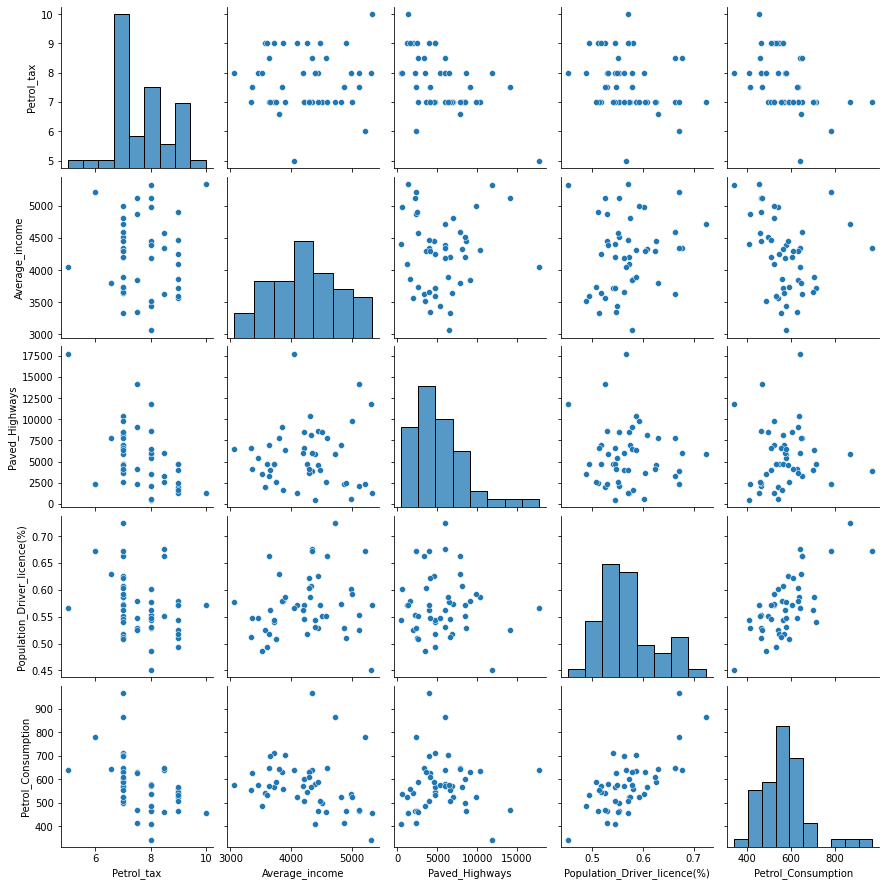

In [6]:
fig = plt.figure(figsize=(12, 12))
sns.pairplot(df)
fig.show()

![meme_regression.png](https://homel.vsb.cz/~svo0175/meme_regression.png)

## What about the a correlation coeffs'?
- What row/column is the most important from the heatmap? Why?
- Are correlations among predictors good or bad?

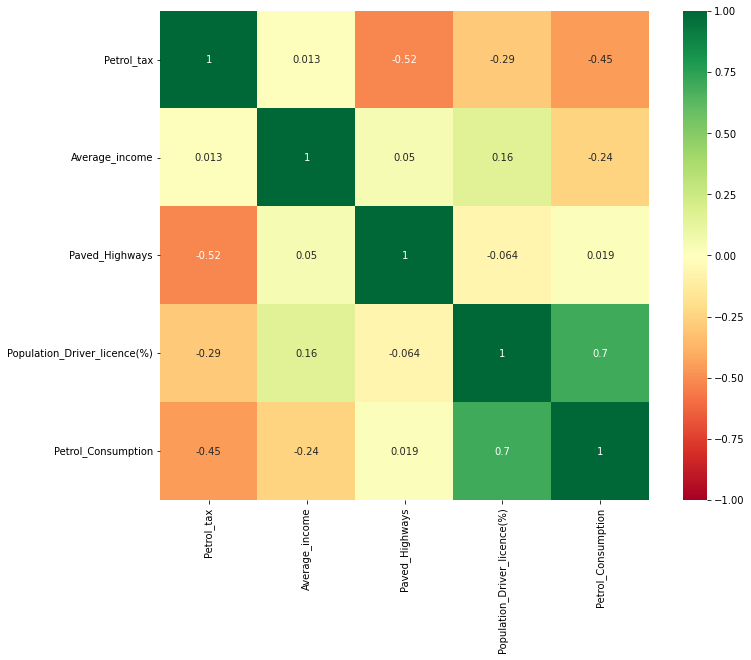

In [7]:
plt.figure(figsize=(12, 9))
sns.heatmap(df.corr(), square=True, cmap='RdYlGn', vmin=-1, vmax=1, annot=True)

## Can you see any outliers in the data?
## What about skewness or variance differences?

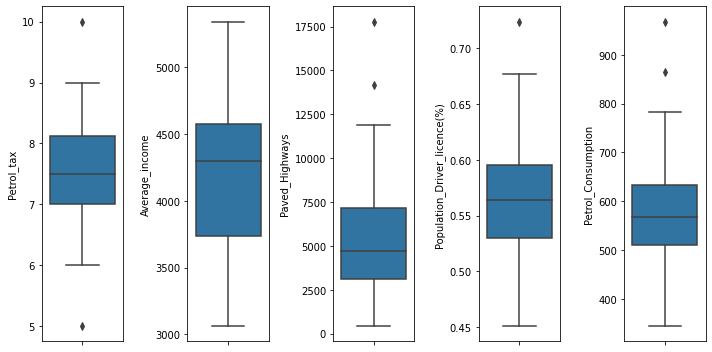

In [8]:
fig, axes = plt.subplots(1, df.shape[1], figsize=(10, 5))

for i, col in enumerate(df.columns):
    ax = axes.flatten()[i]
    sns.boxplot(data=df, y=col, ax=ax)
        
fig.tight_layout()

## Let's build our first simple regression models with just 2 variables and compare them
- We will split the data into train/test set
- Then we can build the models and evaluate them

### There are many metrics used for the perormance evaluation
- MAE, RMSE, MAPE, R2, etc. - do you know what these abbr. mean?
- Do we want these metrics to go lower or higher? nejníže
- You can take a look at [this](https://towardsdatascience.com/regression-an-explanation-of-regression-metrics-and-what-can-go-wrong-a39a9793d914) or [this](https://www.analyticsvidhya.com/blog/2021/05/know-the-best-evaluation-metrics-for-your-regression-model/) for more details

In [9]:
df.columns

Index(['Petrol_tax', 'Average_income', 'Paved_Highways',
       'Population_Driver_licence(%)', 'Petrol_Consumption'],
      dtype='object')

In [10]:
X, y = df.drop('Petrol_Consumption', axis=1), df['Petrol_Consumption']

In [11]:
X.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%)
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


In [12]:
y.head()

0    541
1    524
2    561
3    414
4    410
Name: Petrol_Consumption, dtype: int64

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=13)

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((38, 4), (10, 4), (38,), (10,))

### Model 1

In [15]:
s_column = 'Population_Driver_licence(%)'
alg = LinearRegression()
alg.fit(pd.DataFrame(X_train[s_column]), y_train)

LinearRegression()

In [16]:
y_pred = alg.predict(pd.DataFrame(X_test[s_column]))

## How would the regression line formula look like?

y=ax+b

In [17]:
alg.coef_[0]

1409.6506418001031

In [18]:
alg.intercept_

-228.77388463715886

y=1409x-228

## Let's take a look at the scatterplot of y_test vs. y_pred
- What is the ideal result?

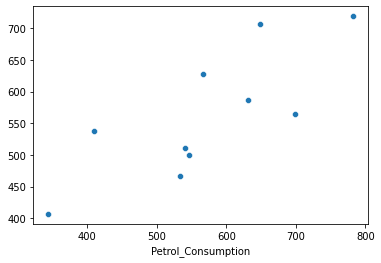

In [19]:
sns.scatterplot(x=y_test, y=y_pred)

## We should always quantify the errors
- MAE, RMSE are in the same units as the predicted variable, always take a look at boxplot or basic statistical properties to rationalize the amount of error according to the range or the variable

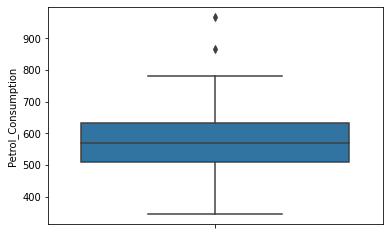

In [20]:
sns.boxplot(y=y)

In [21]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

,MAE,MSE,RMSE,MAPE
0,69.589612,5909.265423,76.871747,13.030434


13% chyba

### Model 2
- Compare the model with the first one

In [22]:
s_column = 'Paved_Highways'
alg = LinearRegression()
alg.fit(pd.DataFrame(X_train[s_column]), y_train)

LinearRegression()

In [23]:
y_pred = alg.predict(pd.DataFrame(X_test[s_column]))

## Let's take a look at the scatterplot of y_test vs. y_pred now

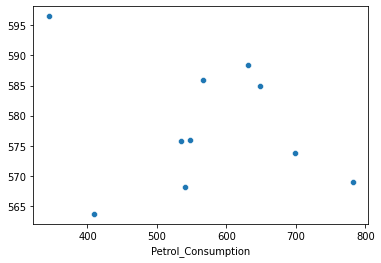

In [24]:
sns.scatterplot(x=y_test, y=y_pred)

In [25]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

,MAE,MSE,RMSE,MAPE
0,96.856205,15798.747857,125.69307,19.426587


## Which one of the two models is better and why?

## The obvious next step is using more than one feature in the model, so let's try that

### MLR

In [26]:
alg = LinearRegression()
alg.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = alg.predict(X_test)

## How would the regression line formula look like?

In [28]:
alg.coef_

array([-4.02146155e+01, -6.27881489e-02, -3.35821983e-03,  1.42662122e+03])

In [29]:
alg.intercept_

353.4972912944651

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

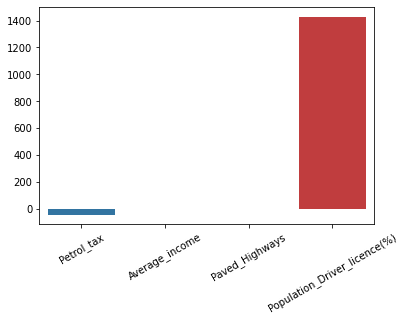

In [30]:
sns.barplot(x=X_train.columns, y=alg.coef_)
plt.xticks(rotation=30)

## Let's take a look at the scatterplot of y_test vs. y_pred

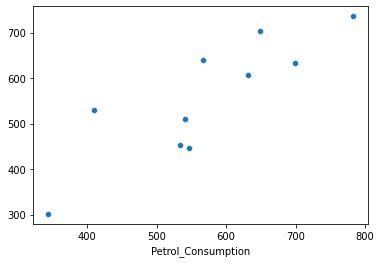

In [31]:
sns.scatterplot(x=y_test, y=y_pred)

In [32]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

,MAE,MSE,RMSE,MAPE
0,64.211372,4960.283075,70.429277,12.194036


## Is it wise to have a model with coefficients of magnitude higher values than for other variables?
- What can go wrong?

## What is a colinearity? 
- Why it may becaome an issue for regression models?

![colinear_meme.jpg](https://homel.vsb.cz/~svo0175/colinear_meme.jpg)

## The method for dealing with both of these issues is called regularization
- We have two types of it - L1 (Lasso) and L2 (Ridge). What is the difference between them?
- Let's try both of them.

### Lasso

In [33]:
alg = Lasso(alpha=3, random_state=13)
alg.fit(X_train, y_train)

Lasso(alpha=3, random_state=13)

In [34]:
y_pred = alg.predict(X_test)

## How would the regression line formula look like?

In [35]:
alg.coef_

array([-5.07274306e+01, -4.45920542e-02, -5.79196797e-03,  2.10886745e+02])

In [36]:
alg.intercept_

1066.6700365032798

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

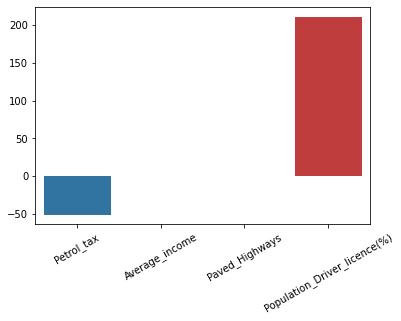

In [37]:
sns.barplot(x=X_train.columns, y=alg.coef_)
plt.xticks(rotation=30)

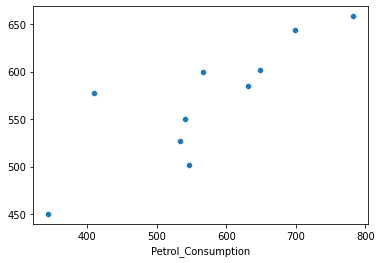

In [38]:
sns.scatterplot(x=y_test, y=y_pred)

In [39]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

,MAE,MSE,RMSE,MAPE
0,64.087218,6517.545286,80.731315,12.715199


### Ridge

In [40]:
alg = Ridge(alpha=1, random_state=13)
alg.fit(X_train, y_train)

Ridge(alpha=1, random_state=13)

In [41]:
y_pred = alg.predict(X_test)

## How would the regression line formula look like?

In [42]:
alg.coef_

array([-5.50501422e+01, -4.24193615e-02, -6.57133145e-03,  1.21471042e+02])

In [43]:
alg.intercept_

1146.0866718368409

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

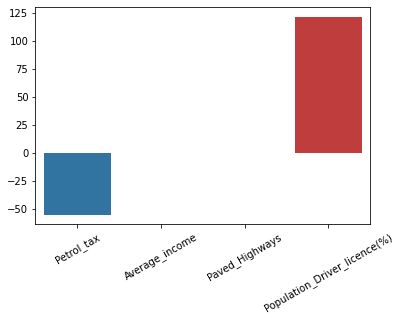

In [44]:
sns.barplot(x=X_train.columns, y=alg.coef_)
plt.xticks(rotation=30)

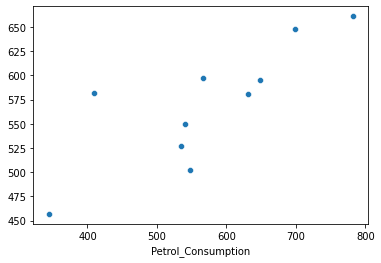

In [45]:
sns.scatterplot(x=y_test, y=y_pred)

In [46]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

,MAE,MSE,RMSE,MAPE
0,65.337108,6823.203287,82.602683,13.055488


## What is the difference among the coefficients values with enabled/disabled regularization?

## There are usually differences among the variables ranges which may bring some difficulties for the coefficient optimization. 

## If the ranges are similar, the optimization process should be a lot easier. 

## Due to that, we usually use MinMax or StdScale (we are not limited to this two) preprocessing before applying a regression model.

### Why do we fit the scaler only on X_train?

In [47]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

### Try 0, 1 and 10 for alpha parameter. What is different?

In [55]:
alg = Lasso(alpha=10, random_state=13)
alg.fit(X_train_std, y_train)

Lasso(alpha=10, random_state=13)

In [56]:
y_pred = alg.predict(X_test_std)

## How would the regression line formula look like?

In [57]:
alg.coef_

array([-22.36306744, -25.80148027,  -0.        ,  63.11400058])

In [58]:
alg.intercept_

578.4736842105262

## How are now the values different?

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

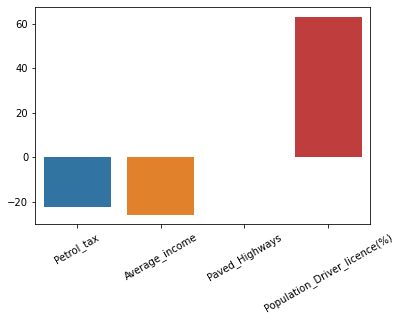

In [59]:
sns.barplot(x=X_train.columns, y=alg.coef_)
plt.xticks(rotation=30)

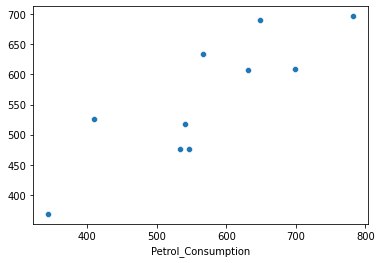

In [60]:
sns.scatterplot(x=y_test, y=y_pred)

In [61]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

,MAE,MSE,RMSE,MAPE
0,60.173284,4549.176321,67.447582,10.96381


## We are obviously not limited to linear regression for the regression tasks.
### Usually there is a regression alternative for most of the classification models in SkLearn. We can try for example tree-based models.

### Random forest

In [62]:
alg = RandomForestRegressor(n_estimators=5,random_state=13)
alg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5, random_state=13)

In [63]:
y_pred = alg.predict(X_test)

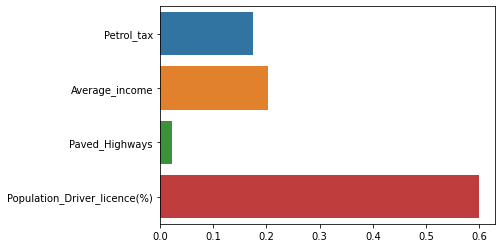

In [64]:
sns.barplot(x=alg.feature_importances_, y=X_train.columns)

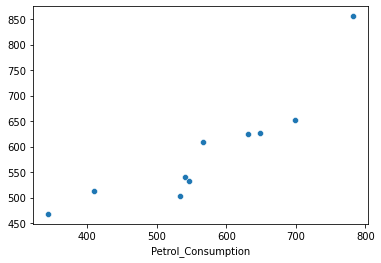

In [65]:
sns.scatterplot(x=y_test, y=y_pred)

In [66]:
compute_metrics_raw(y_true=y_test, y_pred=y_pred)

,MAE,MSE,RMSE,MAPE
0,46.46,3722.164,61.00954,9.788407


![all_meme.png](https://homel.vsb.cz/~svo0175/all_meme.png)